In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('data.csv')

# A la columna de Kilómetros le sacamos el km y lo convertimos a número
data['Kilómetros'] = data['Kilómetros'].str.replace(' km', '').str.replace(',', '').astype(int)

# Visualizar los primeros registros para asegurarnos de que se han cargado correctamente
print(data.head())

# Definir las características (features) y el objetivo (target)
X = data[['Kilómetros', 'Edad', 'Modelo']]
X = pd.get_dummies(X, columns=['Modelo'])
y = data['Precio']

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# y_train_max = y_train.max()
# y_test = y_test / y_train.max()
# y_train = y_train / y_train.max()

# X_train = pd.get_dummies(X_train, columns=['Modelo'])
# X_test = pd.get_dummies(X_test, columns=['Modelo'])

# Normalizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

   Unnamed: 0    Marca Modelo  Kilómetros        Precio  Edad
0           0  Peugeot   2008       23000  21634.614423   2.0
1           1  Peugeot   2008       17000  21153.845192   3.0
2           2  Peugeot   2008       17500  19711.538462   3.0
3           3  Peugeot   2008      123600  14423.076923   6.0
4           4  Peugeot   2008       43000  12019.230769   8.0


/Users/ninarigal/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([128, 1, 1])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/ninarigal/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([109, 1, 1])) that is different to the input size (torch.Size([109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/ninarigal/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([124, 1, 1])) that is different to the input size (torch.Size([124, 1])). This will likely lead to incorrect results

Epoch 1/100, Train Loss: 1022276250.7428571, Test Loss: 621432307.6571429
Epoch 2/100, Train Loss: 518525698.74285716, Test Loss: 500798869.48571426
Epoch 3/100, Train Loss: 486070071.8857143, Test Loss: 494337278.17142856
Epoch 4/100, Train Loss: 483001416.3428571, Test Loss: 492325050.05714285
Epoch 5/100, Train Loss: 481405283.6571429, Test Loss: 492023018.9714286
Epoch 6/100, Train Loss: 480779807.7714286, Test Loss: 491889964.3428571
Epoch 7/100, Train Loss: 480448816.8, Test Loss: 490975494.4
Epoch 8/100, Train Loss: 480953321.94285715, Test Loss: 490841393.37142855
Epoch 9/100, Train Loss: 480178521.14285713, Test Loss: 490788041.14285713
Epoch 10/100, Train Loss: 480586734.74285716, Test Loss: 490505046.4
Epoch 11/100, Train Loss: 480307725.0285714, Test Loss: 490350337.82857144
Epoch 12/100, Train Loss: 480213538.17142856, Test Loss: 490764234.51428574
Epoch 13/100, Train Loss: 480751684.45714283, Test Loss: 490256186.9714286
Epoch 14/100, Train Loss: 480046782.17142856, Test 

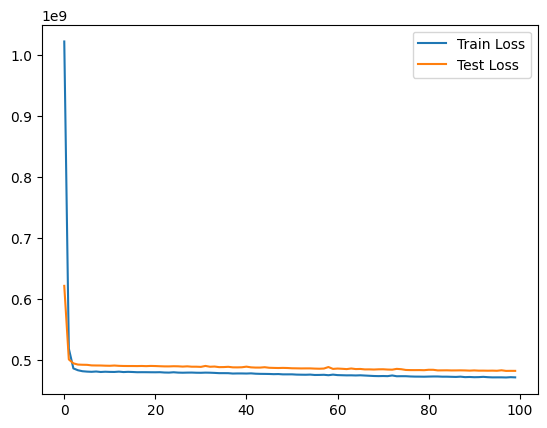

In [3]:
# Definir el tamaño del lote
batch_size = 128

# Crear un DataLoader para los datos de entrenamiento
train_data = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

# Crear un DataLoader para los datos de prueba
test_data = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

# Definir la arquitectura de la red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            # nn.Linear(3, 64),
            nn.Linear(166, 16),
            nn.ReLU(),
            # nn.Linear(64, 64),
            # nn.Linear(64, 128),
            # nn.ReLU(),
            # nn.Linear(128, 64),
            nn.Linear(16, 32),
            nn.ReLU(),
            # nn.Linear(64, 1)
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)
    
# Crear una instancia de la red neuronal
model = NeuralNetwork().to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Entrenar la red neuronal
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            test_loss += loss.item()
        test_losses.append(test_loss / len(test_loader))

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [4]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test.to(device))
    loss = criterion(y_pred, y_test.unsqueeze(1).to(device))
    print(f"Test Loss: {loss.item()}")
    print(f"Error: {loss.item() }")

Test Loss: 482224480.0
Error: 482224480.0


/Users/ninarigal/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4476, 1, 1])) that is different to the input size (torch.Size([4476, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [10]:
X_new = pd.DataFrame({
    'Kilómetros': [100000],
    'Edad': [4],
    'Modelo': ['SW4']
})
X_new = pd.get_dummies(X_new, columns=['Modelo'])
X_new = scaler.fit_transform(X_new)
X_new = torch.tensor(X_new, dtype=torch.float32)
print(X_new)
y_pred = model(X_new)
print(f"El precio estimado del coche es: {y_pred:.2f} €")

tensor([[0., 0., 0.]])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x3 and 166x16)